In [2]:
'''
Ussing Age and Height to predict Weight
'''
import os

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image

import warnings
warnings.filterwarnings('ignore')

In [4]:
filename = "person_data.csv"
data = pd.read_csv(filename)
data

,Age,Height,Weight
0,10,138,23.0
1,11,138,22.0
2,12,138,23.5
3,13,139,24.0
4,14,139,26.0
...,...,...,...
66,76,204,78.0
67,77,205,79.0
68,78,206,83.0
69,79,207,88.0


# Data Exploring

In [5]:
# Data Exploring
def find_missing_percent(data):    
    miss_df = pd.DataFrame(columns=['ColumnName','TotalMissingVals', 'PercentMsiingVals'])

    for col in data.columns:
        NumMissingVals = data[col].isnull().sum()
        PercentMissingVals = (NumMissingVals / data.shape[0])*100
        # Add to the Missing dataframe if there are missing values
        if NumMissingVals > 0:
            data_dict = pd.DataFrame({'ColumnName': [col], 'TotalMissingVals': [NumMissingVals], 'PercentMsiingVals': [PercentMissingVals]})
            miss_df = pd.concat([miss_df, data_dict], ignore_index=True)

    return miss_df

In [6]:
display(find_missing_percent(data))

,ColumnName,TotalMissingVals,PercentMsiingVals


In [7]:
# Data Exploring
statsDF = data.describe(include='all')
display(statsDF)

,Age,Height,Weight
count,71.000000,71.000000,71.000000
mean,45.000000,160.873239,65.281690
std,20.639767,20.842902,17.752805
min,10.000000,138.000000,22.000000
25%,27.500000,143.500000,59.750000
50%,45.000000,155.000000,70.000000
75%,62.500000,171.500000,77.000000
max,80.000000,208.000000,96.000000


In [8]:
# Data Exploring
from pandas.api.types import is_numeric_dtype, is_string_dtype

for col in data.columns:
    if is_string_dtype(data[col]):
        freqDF = data[col].value_counts()
        print(freqDF)
    else:
        print(f'{col} with Min: {data[col].min()} and Max: {data[col].max()}')

Age with Min: 10 and Max: 80
Height with Min: 138 and Max: 208
Weight with Min: 22.0 and Max: 96.0


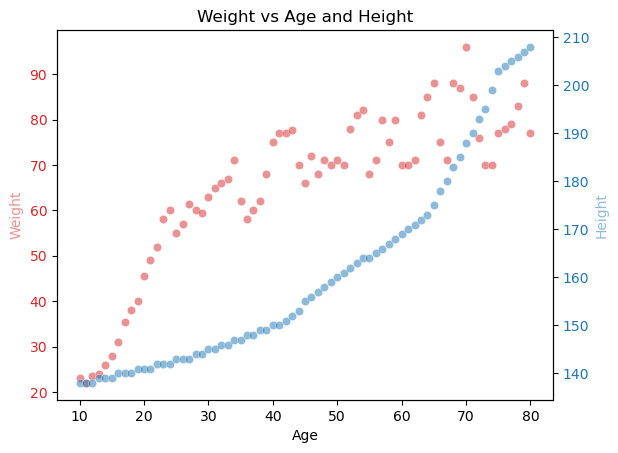

In [11]:
# Data visualization
feature1 = 'Weight'
feature2 = 'Age'
feature3 = 'Height'

# create the figure and axis objects
fig, ax1 = plt.subplots()

# create the figure and axis objects
color = 'tab:red'
ax1.set_xlabel(feature2)
ax1.set_ylabel(feature1, color=color, alpha=0.5)
sns.scatterplot(x=feature2,y=feature1, data=data, color=color, alpha=0.5, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)


# create the second y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(feature3, color=color, alpha=0.5)
sns.scatterplot(x=feature2,y=feature3, data=data, color=color, alpha=0.5, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

# set the title
plt.title(f'{feature1} vs {feature2} and {feature3}')
plt.show()

# Data Partition and Transform

In [16]:
# Data Partition and Transform
feature = ['Age', 'Height']
target = ['Weight'] 

X = data[feature].values
y = data[target].values

[[23. ]
 [22. ]
 [23.5]
 [24. ]
 [26. ]
 [28. ]
 [31. ]
 [35.5]
 [38. ]
 [40. ]
 [45.5]
 [49. ]
 [52. ]
 [58. ]
 [60. ]
 [55. ]
 [57. ]
 [61.3]
 [60. ]
 [59.5]
 [63. ]
 [65. ]
 [66. ]
 [67. ]
 [71. ]
 [62. ]
 [58. ]
 [60. ]
 [62. ]
 [68. ]
 [75. ]
 [77. ]
 [77. ]
 [77.7]
 [70. ]
 [66. ]
 [72. ]
 [68. ]
 [71. ]
 [70. ]
 [71. ]
 [70. ]
 [78. ]
 [81. ]
 [82. ]
 [68. ]
 [71. ]
 [80. ]
 [75. ]
 [80. ]
 [70. ]
 [70. ]
 [71. ]
 [81. ]
 [85. ]
 [88. ]
 [75. ]
 [71. ]
 [88. ]
 [87. ]
 [96. ]
 [85. ]
 [76. ]
 [70. ]
 [70. ]
 [77. ]
 [78. ]
 [79. ]
 [83. ]
 [88. ]
 [77. ]]


In [17]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f'Before Scaling: Mean {np.mean(X, axis=0)} STD {np.std(X, axis=0)}')
print(f'After Scaling: Mean {np.mean(X_scaled, axis=0)} STD {np.std(X_scaled, axis=0)}')


Before Scaling: Mean [ 45.         160.87323944] STD [20.49390153 20.69560039]
After Scaling: Mean [3.12738880e-18 2.50191104e-16] STD [1. 1.]


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca[0:5])

[[-1.98912492  0.42610453]
 [-1.95462165  0.39160125]
 [-1.92011837  0.35709798]
 [-1.85144808  0.35676171]
 [-1.8169448   0.32225843]]


In [20]:
print(pca.explained_variance_ratio_*100)
# theo chiều pc1 thì mức độ toàn vẹn dữ liệu (variance) sự giao động là 97%

[97.36416205  2.63583795]


In [21]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)
print(X_pca[0:5])
print(pca.explained_variance_ratio_*100)

[[-1.98912492]
 [-1.95462165]
 [-1.92011837]
 [-1.85144808]
 [-1.8169448 ]]
[97.36416205]


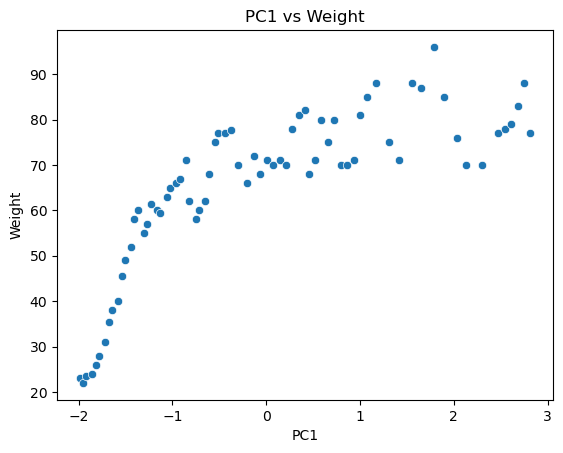

In [22]:
feature1 = 'PC1'
feature2 = 'Weight'
plt.figure()
sns.scatterplot(x=feature1,y=feature2, data=pd.DataFrame(np.concatenate((X_pca, y), axis=1), columns=[feature1, feature2]))
plt.title(f'{feature1} vs {feature2}')
plt.show()

# Modeling

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)# đã chuẩn hoá nên không cần bias
X_poly = poly.fit_transform(X_pca)

print(X_poly.shape)

(71, 5)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

print(f'Root Mean squared error: {mean_squared_error(y, y_pred, squared=False)}')
print(f'Coefficient of determination: {r2_score(y, y_pred)}')

Root Mean squared error: 5.409899174769268
Coefficient of determination: 0.9058100250913819


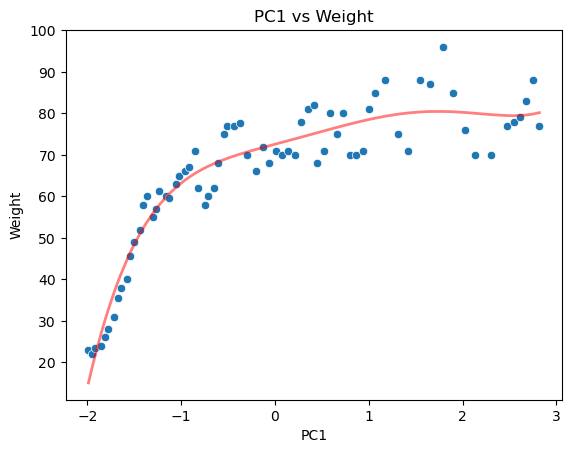

In [32]:
feature1 = 'PC1'
feature2 = 'Weight'
plt.figure()
sns.lineplot(x=feature1,y=y_pred.flatten(), data=pd.DataFrame(np.concatenate((X_pca, y), axis=1), columns=[feature1, feature2]), color='red', alpha=0.5, linewidth=2)
sns.scatterplot(x=feature1,y=feature2, data=pd.DataFrame(np.concatenate((X_pca, y), axis=1), columns=[feature1, feature2]))
plt.title(f'{feature1} vs {feature2}')
plt.show()

In [33]:
# Pipeline: gom nhiều bước thành 1 bước
from sklearn.pipeline import Pipeline

sc = StandardScaler()
pca = PCA(n_components=1)
poly_features = PolynomialFeatures(degree=5, include_bias=False)
model = LinearRegression()

pipeline = Pipeline([('sc', sc), ('pca', pca), ('poly_features', poly_features), ('model', model)])
pipeline.fit(X, y)

Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA(n_components=1)),
                ('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('model', LinearRegression())])

In [34]:
y_pred_pipe = pipeline.predict(X)
print(f'Root Mean squared error: {mean_squared_error(y, y_pred, squared=False)}')
print(f'Coefficient of determination: {r2_score(y, y_pred)}')

Root Mean squared error: 5.409899174769268
Coefficient of determination: 0.9058100250913819


In [35]:
X_new = np.array([[20, 170], [20, 180]])
weight_pred = pipeline.predict(X_new)
display(weight_pred)

array([[68.79520423],
       [71.26264632]])